# Moffat Fit with Uncertainties in SABA (Sherpa-Astropy Bridge)

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from imaka.analysis import moffat
from saba import SherpaFitter
from astropy.io import fits
from astropy.table import Table
%matplotlib inline

In [128]:
# Initialization

stack_dir = "//g/lu/data/imaka/onaga/20180531/sta/reduce/stacks/"
stack1 = stack_dir + "FLD2_stack_threeWFSLS_B2_c.fits"
stars1 = stack_dir + "FLD2_stack_threeWFSLS_B2_c_stars.txt"
img, hdr = fits.getdata(stack1, header=True)
stars = Table.read(stars1, format='ascii')
x_cent = np.array(stars['xcentroid'])
y_cent = np.array(stars['ycentroid'])
ii=0
z = img[int(y_cent[ii])-10 : int(y_cent[ii])+10+1, int(x_cent[ii])-10 : int(x_cent[ii])+10+1]

#np.random.seed(0x1337)
#true = moffat.Elliptical_Moffat2D(N_sky = 450, amplitude=2000,  x_0=10.9, y_0=10.7, width_x = 4, width_y=6, phi=.7, power=2.5)
err = 100
err_grid = err * np.random.uniform(-1, 1, size=(len(x), len(y)))
y, x = np.mgrid[:21, :21]
#z = true(x, y) + err_grid
fit_model = moffat.Elliptical_Moffat2D(N_sky = 0, amplitude=np.amax(z),  x_0=10.5, y_0=10.5, width_x = 4, width_y=6, phi=20, power=3)


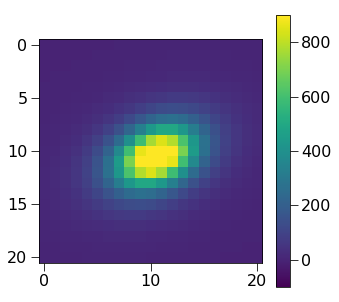

In [135]:
plt.figure(figsize=(5,5))
plt.imshow(fit_model(x, y), vmin=-100, vmax=900)
plt.colorbar()

In [109]:
# Fitting

sfit = SherpaFitter(statistic='LeastSq', optimizer='levmar', estmethod='confidence')
fitted_model = sfit(fit_model, x, y, z)

In [111]:
χ2=np.inf
for model in fitted_model:
    χ2_temp = np.sum(((model(x,y)-z)/err_grid)**2)
    if χ2_temp < χ2:
        χ2 = χ2_temp
        mod = model

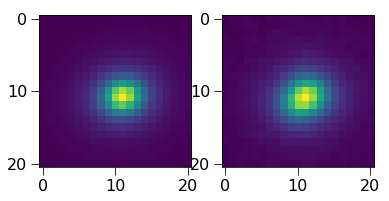

In [115]:
plt.subplot(121)
plt.imshow(mod(x,y))
plt.subplot(122)
plt.imshow(z)

In [110]:
fitted_model

[<Elliptical_Moffat2D(N_sky=133.02093056, amplitude=3040.94555168, phi=0.01832402, power=2.12779741, x_0=14.64162033, y_0=8.51133748, width_x=28.89122053, width_y=4.94806763, name='')>,
 <Elliptical_Moffat2D(N_sky=113.7014697, amplitude=2800.06302477, phi=0.01380887, power=2.26595207, x_0=15.23986752, y_0=8.71578093, width_x=34.65321279, width_y=5.05954221, name='')>,
 <Elliptical_Moffat2D(N_sky=283.93206544, amplitude=1199.4971392, phi=0.02248232, power=2.74324942, x_0=11.71462713, y_0=9.78248272, width_x=7.36181191, width_y=4.29462248, name='')>,
 <Elliptical_Moffat2D(N_sky=291.98550866, amplitude=1222.71709678, phi=0.00884508, power=3.00278856, x_0=11.20028412, y_0=10.02080788, width_x=5.58468159, width_y=4.24909695, name='')>,
 <Elliptical_Moffat2D(N_sky=293.8870148, amplitude=804.23309798, phi=-0.00287998, power=2.39997187, x_0=10.85200132, y_0=10.50112894, width_x=3.89891436, width_y=3.92045756, name='')>,
 <Elliptical_Moffat2D(N_sky=276.99105536, amplitude=172.27427111, phi=-0.0

In [140]:
Δm = -2.5*np.log10(.89/1.96)
Δm

0.8571651617789082

In [141]:
1.96/.89

2.202247191011236